In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/diabetes_prediction_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
df.shape

(100000, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [6]:
#check if there is Null values in data or not
df.isnull().sum().sum()

np.int64(0)

In [7]:
#check if there is duplicate values in data or not
df.duplicated().sum()

np.int64(3854)

In [8]:
#Removing the duplicated values
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.shape

(96146, 9)

In [11]:
#Handling Outliers in BMI Using IQR Method
q1 = df['bmi'].quantile(0.25)
q3 = df['bmi'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df['bmi']=df['bmi'].clip(lower_bound,upper_bound)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>,
        <Axes: title={'center': 'heart_disease'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'HbA1c_level'}>,
        <Axes: title={'center': 'blood_glucose_level'}>],
       [<Axes: title={'center': 'diabetes'}>, <Axes: >, <Axes: >]],
      dtype=object)

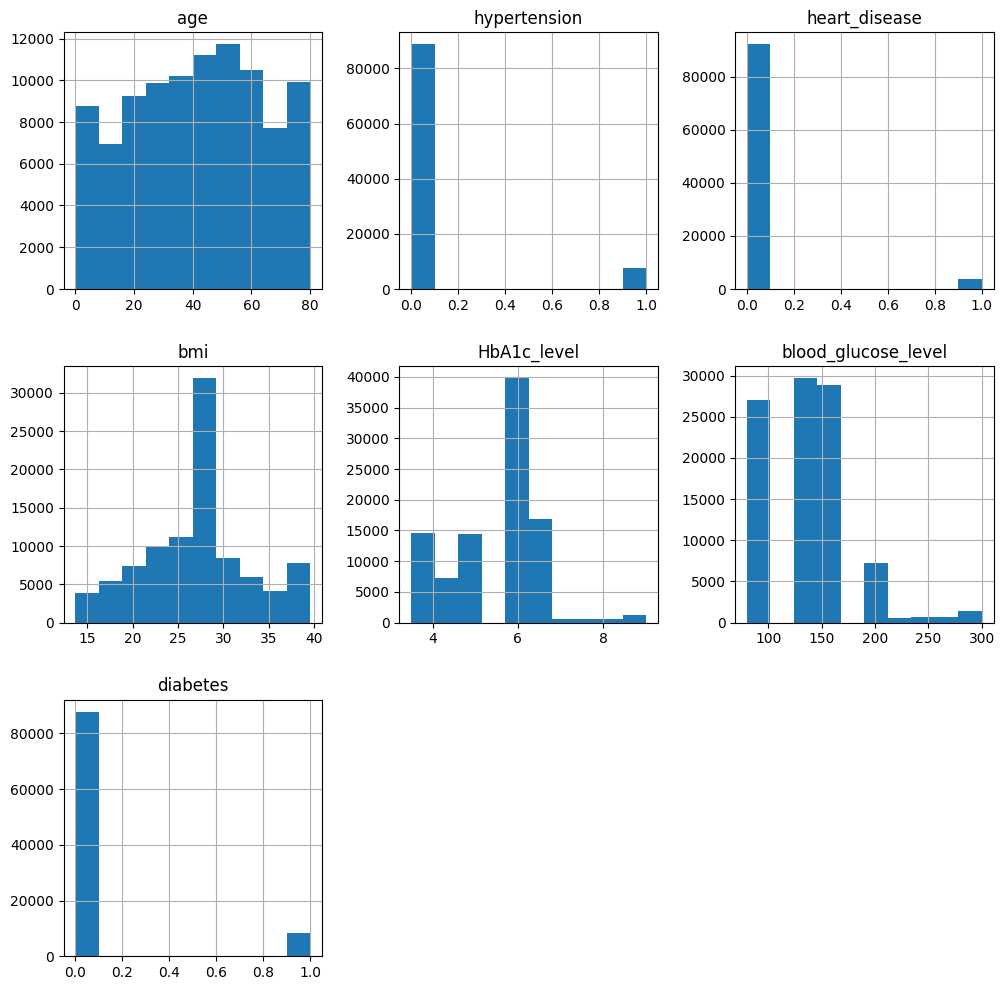

In [12]:
df.hist(figsize=(12,12))

In [13]:
df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [14]:
df["gender"]=df["gender"].str.replace("Other","Female")

In [15]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

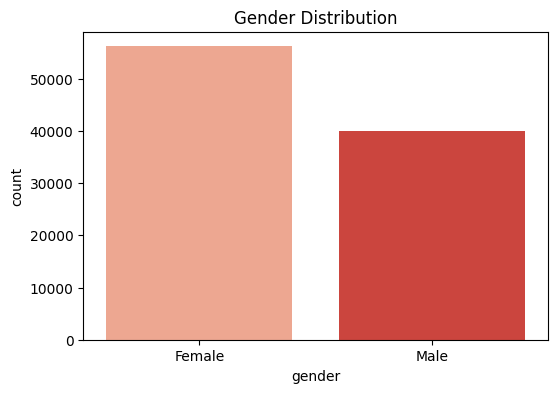

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x="gender", data=df, palette="Reds")
plt.title("Gender Distribution")
plt.show()

In [17]:
#Convert categorical data into numerical data
le = LabelEncoder()
df['gender']= le.fit_transform(df['gender'])
df['smoking_history']= le.fit_transform(df['smoking_history'])

In [18]:
df['gender'].unique()

array([0, 1])

In [19]:
df['smoking_history'].unique()

array([4, 0, 1, 3, 2, 5])

In [20]:
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
5,0,20.0,0,0,4,27.32,6.6,85,0
6,0,44.0,0,0,4,19.31,6.5,200,1
7,0,79.0,0,0,0,23.86,5.7,85,0
8,1,42.0,0,0,4,33.64,4.8,145,0
9,0,32.0,0,0,4,27.32,5.0,100,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  int64  
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  int64  
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 7.3 MB


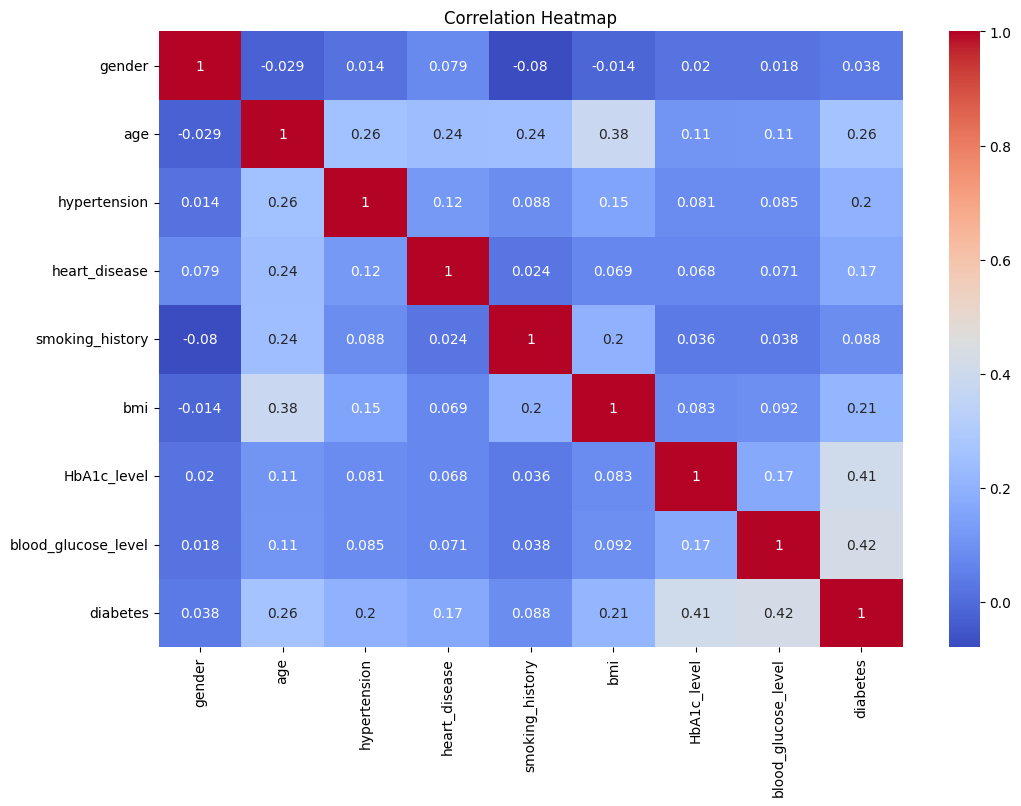

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [23]:
numerical_cols = ['age','bmi', 'HbA1c_level', 'blood_glucose_level']
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [24]:
X = df.drop('diabetes',axis=1)
y = df['diabetes']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=22)
print(X_train.shape, X_test.shape)

(76916, 8) (19230, 8)


In [25]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

Accuracy on test data 96.76547061882475 | Accuracy on train data 99.89989078995268



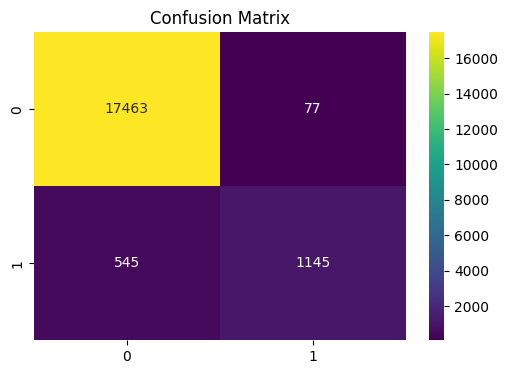


              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17540
           1       0.94      0.68      0.79      1690

    accuracy                           0.97     19230
   macro avg       0.95      0.84      0.88     19230
weighted avg       0.97      0.97      0.97     19230



In [26]:
y_pred = rf_model.predict(X_test)
print('Accuracy on test data', accuracy_score(y_test,y_pred)*100, '|', 'Accuracy on train data', accuracy_score(y_train, rf_model.predict(X_train))*100)
print()
conf = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf,annot=True,fmt='d', cmap='viridis')
plt.title("Confusion Matrix")
plt.show()
print()
print(classification_report(y_test,y_pred))

In [27]:
print(X.columns.tolist()) # this to know the index of scaler input

['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']


In [30]:
# System Prediction:
input = (1, 50, 1, 0, 1, 27.32, 5.7, 260)
# Convert input to numpy and reshape
input_as_numpy = np.asarray(input).reshape(1, -1)

numerical_indices = [1, 5, 6, 7]
input_as_numpy[:, numerical_indices] = scaler.transform(input_as_numpy[:, numerical_indices])

# Predict
pred = rf_model.predict(input_as_numpy)

# Output result
if pred[0] == 1:
    print("Sorry about saying this but you have a diabetic")
else:
    print("OHHHHHHHHHHHHH you do not have diabetic")


Sorry about saying this but you have a diabetic


In [31]:
import joblib
joblib.dump(rf_model, 'rf_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']